# Titanic Survival Analysis: Age to Survival Exploration

## Project Overview

This notebook explores the Kaggle Titanic dataset to analyze survival patterns among passengers. The primary goal is to identify key features that influenced survival rates and build insights for predictive modeling.

**Dataset**: Titanic passenger data from Kaggle competition

**Specific Notebook Objective**: Exploratory Data Analysis (EDA) focusing on age-based survival patterns

---

## 1. Data Loading and Initial Exploration

First, let's load the training dataset and examine its structure.

In [15]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt


titanic_training_df: DataFrame = pd.read_csv("../data/train.csv")
titanic_training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Initial Observations

The dataset contains 891 passengers with the following key features:
- **Survived**: Target variable (0 = No, 1 = Yes)
- **Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Sex**: Gender of passenger
- **Age**: Age in years (contains missing values)
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Fare**: Passenger fare
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**Note**: The Age column has missing values that will need to be handled in future modeling steps.

---

## 2. Age Group Analysis

To better understand survival patterns across different age ranges, I'll create age groups in 10-year intervals and analyze survival rates within each group.

### Data Transformation

Using a custom utility function, I'll bin passengers into age groups and extract the relevant columns for analysis (Survived, Age, AgeGroup).

In [22]:
from src.constants import AGE_GROUP_HEADER, AGE_HEADER, SURVIVED_HEADER
from src.age_group_survival.age_group_utils import create_age_to_survival_df

age_survival_df = create_age_to_survival_df(titanic_training_df)

age_survival_df.head()

,Survived,Age,AgeGroup
0,0,22.0,20-29
1,1,38.0,30-39
2,1,26.0,20-29
3,1,35.0,30-39
4,0,35.0,30-39


The transformed dataset now includes an `AgeGroup` column that categorizes passengers into 10-year age brackets (e.g., 20-29, 30-39).

---

## 3. Visualization: Survival Rates by Age Group

Now let's visualize the survival rates across different age groups to identify patterns.

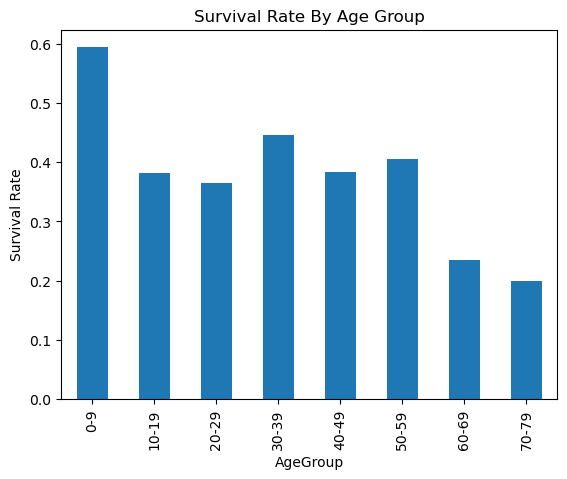

In [17]:
survival_by_age_group = age_survival_df.groupby(AGE_GROUP_HEADER, observed=True)[SURVIVED_HEADER].mean()
survival_by_age_group.plot(kind="bar")

plt.ylabel("Survival Rate")
plt.title("Survival Rate By Age Group")

plt.show()

### Key Insight 1: Children Had Higher Survival Rates

The youngest age group (0-9 years) shows a notably higher survival rate compared to most adult age groups. This aligns with the "women and children first" evacuation protocol historically used in maritime disasters.

---

## 4. Alternative Visualizations

Let's explore different ways to visualize the relationship between age groups and survival.

### Survival Rate Bar Chart

This chart shows the proportion of survivors within each age group.

<Axes: xlabel='AgeGroup'>

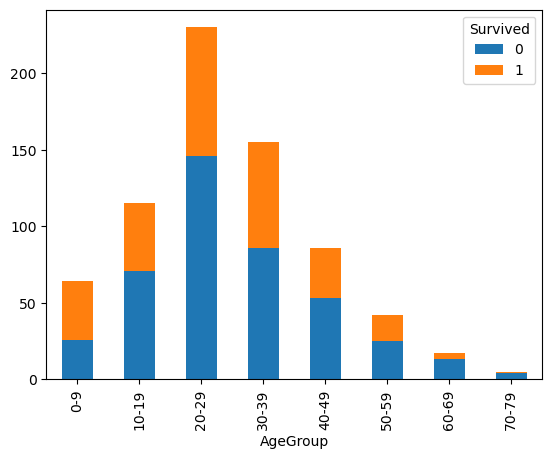

In [18]:
age_survival_df.groupby([AGE_GROUP_HEADER, SURVIVED_HEADER], observed=True).size().unstack().plot(kind='bar', stacked=True)

### Stacked Bar Chart: Absolute Counts

This visualization shows the actual count of survivors vs. non-survivors in each age group, giving us insight into both survival rates and the distribution of passengers across age groups.

<Axes: xlabel='AgeGroup', ylabel='count'>

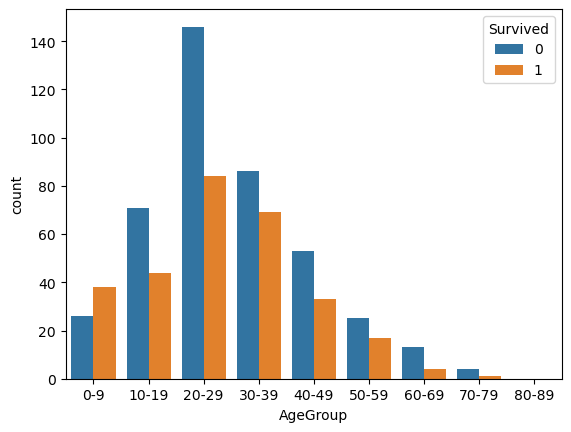

In [20]:
import seaborn as sns

sns.countplot(x=AGE_GROUP_HEADER, hue=SURVIVED_HEADER, data=age_survival_df)

---

## 5. Summary and Next Steps

### Key Findings

1. **Age is a significant factor in survival**: Younger passengers (0-9 years) had higher survival rates, consistent with prioritizing children during evacuation.

2. **Most passengers were in the 20-40 age range**: The 20-29 and 30-39 age groups had the highest passenger counts, but lower survival rates compared to children.

3. **Data quality consideration**: The Age column contains missing values that need to be addressed before building predictive models.

### Recommended Next Steps

1. Examine interactions between survival and sex
2. Examine interactions between survival and pclass

---

## Technical Notes

This analysis uses custom utility functions from `src/age_group_survival/age_group_utils.py` to maintain code modularity and reusability. All DataFrame column names are accessed through constants defined in `src/constants.py` to ensure consistency across the codebase.